In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [47]:
file_path="datasets/Anaemia.csv"
data=pd.read_csv(file_path)
data.head()


,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,Yes
1,2,F,45.6033,28.1900,26.2067,13.5,No
2,3,F,45.0107,28.9677,26.0215,11.7,No
3,4,F,44.5398,28.9899,26.4703,13.5,No
4,5,M,43.2870,30.6972,26.0158,12.4,No


In [48]:
data.shape

(104, 7)

In [52]:
data.isnull().sum()

Number          0
Sex             0
%Red Pixel      0
%Green pixel    0
%Blue pixel     0
Hb              0
Anaemic         0
dtype: int64

In [53]:
print(data["Sex"].unique())
# print([type(x) for x in data["Sex"].unique()])

['M' 'F' 'F ' 'M ']
[<class 'str'>, <class 'str'>, <class 'str'>, <class 'str'>]


## **Data Cleaning**

In [59]:
data["Sex"] = data["Sex"].astype(str).str.strip()
data["Anaemic"] = data["Anaemic"].astype(str).str.strip()
print(data["Sex"].unique())
print(data.Anaemic.unique())

['1' '0']
['Yes' 'No']


## **Encoding**

In [62]:
data["Sex"] = data["Sex"].replace({"M": 1, "F": 0})  # only if words exist
data["Sex"] = data["Sex"].astype(float).astype(int)

data["Anaemic"] = data["Anaemic"].replace({"Yes": 1, "No": 0})
data["Anaemic"] = data["Anaemic"].astype(float).astype(int)

print(data["Sex"].unique())
print(data["Anaemic"].unique())
print(data.shape)

[1 0]
[1 0]
(104, 7)


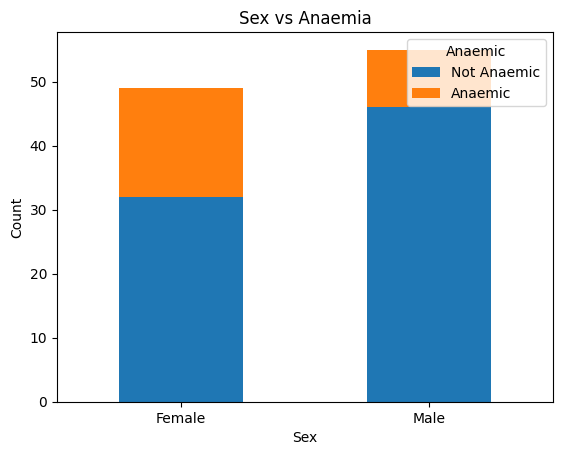

In [67]:
ct = pd.crosstab(data["Sex"], data["Anaemic"])

ct.index = ct.index.map({0: "Female", 1: "Male"})
ct.columns = ct.columns.map({0: "Not Anaemic", 1: "Anaemic"})

ct.plot(kind="bar", stacked=True)
plt.xlabel("Sex")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.title("Sex vs Anaemia")
plt.show()

## **Data Correlation**

<function matplotlib.pyplot.show(close=None, block=None)>

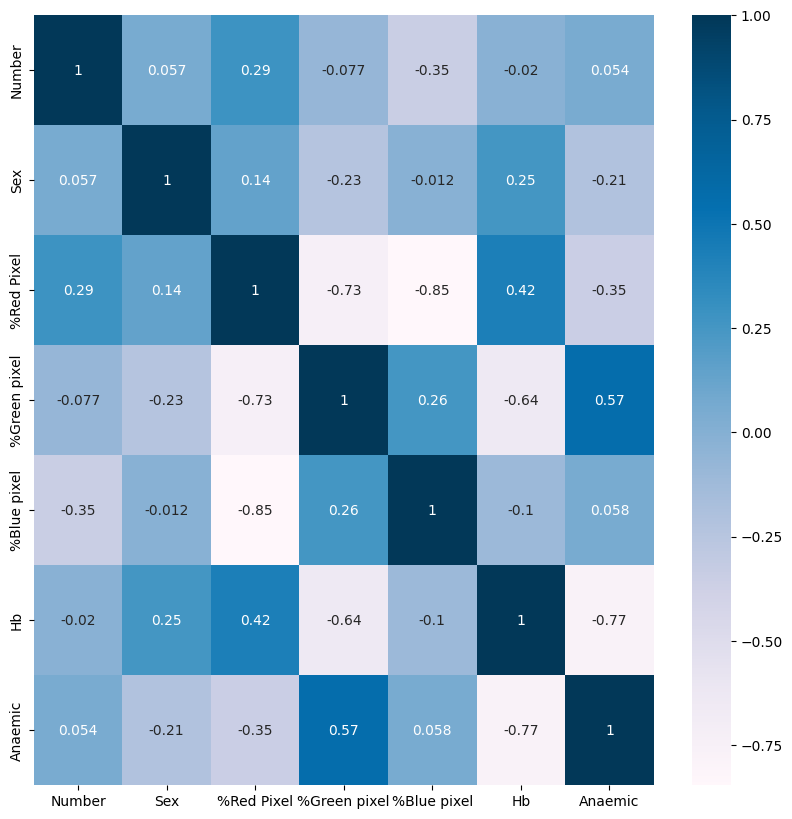

In [68]:
plt.figure(figsize=(10,10))
# cor=data.corr()--->corr usually works only for int cols, but here all cols r taken so error
cor=data.select_dtypes(include=['number']).corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.PuBu)
plt.show

In [70]:
# Selecting highly correlated variables/features


cor_target=abs(cor['Anaemic'])
relevant_features=cor_target[cor_target>0.2]   # selecting highly correlated features
names=[index for index, value in relevant_features.items()]
names.remove('Anaemic')
print(names)
print(len(names))

['Sex', '%Red Pixel', '%Green pixel', 'Hb']
4


In [66]:
data.head()

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,1,43.2555,30.8421,25.9025,6.3,1
1,2,0,45.6033,28.1900,26.2067,13.5,0
2,3,0,45.0107,28.9677,26.0215,11.7,0
3,4,0,44.5398,28.9899,26.4703,13.5,0
4,5,1,43.2870,30.6972,26.0158,12.4,0


---
## **Data Pre-processing**

In [86]:
data=data.drop(columns=["Number"])    #drop the index col
# Target var
y=data.Anaemic
# For features, select all cols except target or u specify each n every col manually
X=data.drop("Anaemic",axis=1)

In [87]:
# Split 80%-training data, 20%- Validation/test data

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1,stratify=y)


---
## **Logistic Regression**

In [141]:
from sklearn.linear_model import LogisticRegression

logr_model=LogisticRegression(random_state=2)
logr_model.fit(X_train,y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",2
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multic

In [142]:
pred=logr_model.predict(X_test)

In [143]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))



# Confusion Matrix:
#               Predicted No            Predicted Yes
# Actual No         16                      0
# Actual Yes        1                       4
# Healthy patients correctly identified-->16 hav no anaemia and r predicted with no anaemia
# Anaemic patients correctly detected. --->4 hav anaemia and predicted
# No healthy patient was wrongly marked anaemic --->0
# Anaemic patient predicted as healthy → this is dangerous in healthcare. ---->1

Accuracy: 0.9523809523809523
[[16  0]
 [ 1  4]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.80      0.89         5

    accuracy                           0.95        21
   macro avg       0.97      0.90      0.93        21
weighted avg       0.96      0.95      0.95        21



---
## **Other Models**

### **Decision Tree**

In [164]:
from sklearn.tree import DecisionTreeClassifier

dt_model=DecisionTreeClassifier(max_depth=3,random_state=2)     # you can limit tree depth : max_depth=3--->Optional but recommended
dt_model.fit(X_train,y_train)

dt_pred=dt_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, dt_pred))
print(confusion_matrix(y_test, dt_pred))
print(classification_report(y_test, dt_pred))

Accuracy: 0.9523809523809523
[[15  1]
 [ 0  5]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.83      1.00      0.91         5

    accuracy                           0.95        21
   macro avg       0.92      0.97      0.94        21
weighted avg       0.96      0.95      0.95        21



> “Decision Tree outperformed Logistic Regression with an F1-score of 0.91 vs 0.89, achieving 95% accuracy and perfect recall for the positive class.”

## **Random Forest**

In [168]:
from sklearn.ensemble import RandomForestClassifier

rf_model=RandomForestClassifier(random_state=2)
rf_model.fit(X_train,y_train)

rf_pred=rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

print(np.array_equal(dt_pred, rf_pred))   # True if both models predict same
# Both are predicting same coz we hav only 21 samples(small dataset) and features are easy to split

Accuracy: 0.9523809523809523
[[15  1]
 [ 0  5]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.83      1.00      0.91         5

    accuracy                           0.95        21
   macro avg       0.92      0.97      0.94        21
weighted avg       0.96      0.95      0.95        21

True


- ### Feature Importance (from Random Forest)

In [170]:
importances = rf_model.feature_importances_

feature_names = ["Sex", "%Red Pixel", "%Green pixel", "%Blue pixel", "Hb"]

feat_imp = pd.Series(importances, index=feature_names)
feat_imp = feat_imp.sort_values(ascending=True)

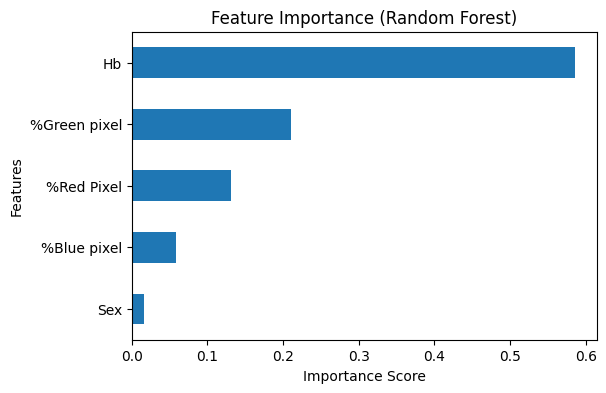

In [171]:
plt.figure(figsize=(6,4))
feat_imp.plot(kind="barh")

plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")

plt.show()

> Hemoglobin was the most influential feature in predicting anaemia, followed by the pixel-based features, while gender had comparatively lower importance. This aligns with medical understanding, where hemoglobin level is the primary indicator of anaemia.

---
## **New Patient Data**
####  new data handling and Probability Prediction

In [144]:

new_patient = [[1,42.3,35.1,22.6,9.8]]
# Sex, %red pixel, %green pixel, %blue pixel, Hb
# Usually u predict on the featues of test data ,i.e., these features only. So, here u pass those features values in the exact order and predict on them using the same pre-trained model
pred_class=logr_model.predict(new_patient)

# These are mostly from an img/ blood smear
# red pixel indicates red intensity on an img (prolly haemoglobin)
# green and blue indicate background, staining, lighting, and tissue differences


C:\Users\Pragya\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [145]:
pred_prob=logr_model.predict_proba(new_patient)
anaemia_prob=pred_prob[0][1]

C:\Users\Pragya\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [146]:
print("Predicted class:", "Anaemic" if pred_class[0] == 1 else "Not Anaemic")
print("Probability of anaemia:", round(anaemia_prob * 100, 2), "%")

Predicted class: Anaemic
Probability of anaemia: 99.7 %


---
## **Predict Function**
### to make new patient prediction easier

In [147]:
def predict_anaemia(model,sex,red,green,blue,hb):
    new_Patient = pd.DataFrame(
        [[sex, red, green, blue, hb]],
        columns=["Sex", "%Red Pixel", "%Green pixel", "%Blue pixel", "Hb"]
    )
    # Instead of passing a list, pass a DataFrame with same column names.--->col names match training done, warning disappears

    pred_Class=model.predict(new_Patient)
    pred_Prob=model.predict_proba(new_Patient)
    anaemia_Prob=pred_Prob[0][1]

    print("Predicted class:", "Anaemic" if pred_Class[0] == 1 else "Not Anaemic")
    print("Probability of anaemia:", round(anaemia_Prob * 100, 2), "%")


In [149]:
predict_anaemia(logr_model,0,38.6,34.3,20.9,11.8)

Predicted class: Anaemic
Probability of anaemia: 96.78 %


In [151]:
predict_anaemia(logr_model,0,40.98,24.44,30.08,7.5)
# If u do get 0.0%---.its not completely 0 but smtg like 0.002% roundd to 0.0%

Predicted class: Not Anaemic
Probability of anaemia: 43.24 %


In [166]:
predict_anaemia(rf_model,0,45.6,22.3,20.9,5.8)

Predicted class: Anaemic
Probability of anaemia: 85.0 %


In [167]:
predict_anaemia(dt_model,0,45.6,22.3,20.9,5.8)

Predicted class: Anaemic
Probability of anaemia: 100.0 %


---
## **Model Comaprision Plot**

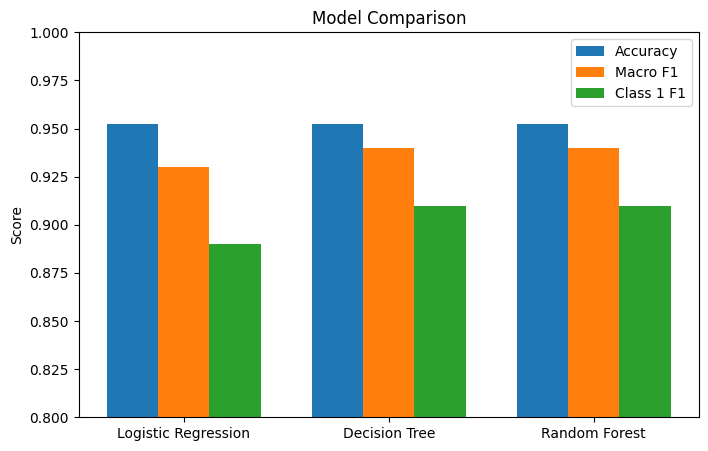

In [172]:
models=["Logistic Regression","Decision Tree","Random Forest"]

# Metrics from your results
accuracy = [0.9523, 0.9523,0.9523]
macro_f1 = [0.93, 0.94,0.94]
class1_f1 = [0.89, 0.91,0.91]

x = np.arange(len(models))
width = 0.25

plt.figure(figsize=(8,5))

plt.bar(x - width, accuracy, width, label='Accuracy')
plt.bar(x, macro_f1, width, label='Macro F1')
plt.bar(x + width, class1_f1, width, label='Class 1 F1')

plt.xticks(x, models)
plt.ylabel('Score')
plt.ylim(0.8, 1.0)
plt.title('Model Comparison')
plt.legend()

plt.show()

> ## *Conclusion*

In this project, multiple machine learning models were implemented to predict the target outcome, including Logistic Regression, Decision Tree, and Random Forest.

After preprocessing the data (handling missing values, encoding categorical features), the models were evaluated using appropriate performance metrics such as accuracy, precision, recall, and F1-score.

Among the models:

- Random Forest achieved the best overall performance, demonstrating better generalization and reduced overfitting due to its ensemble nature.

- Decision Tree produced comparable results but showed signs of overfitting on the training data.

- Logistic Regression performed reasonably well but was limited in capturing non-linear relationships in the dataset.

The feature importance analysis from Random Forest revealed that the most influential features were the key drivers of the model’s predictions, providing interpretability and business insight.

> ### *Key Takeaways*

- Ensemble methods like Random Forest improve robustness and predictive performance.

- Proper preprocessing significantly impacts model accuracy.

- Feature importance helps in understanding the underlying factors affecting predictions.

> ### *Model Performance*
- All models achieved a similar accuracy of ~95%, indicating strong overall predictive capability.

- Decision Tree and Random Forest outperformed Logistic Regression in terms of macro F1-score and Class 1 (Anaemic) F1-score, which is critical because correctly identifying anaemic patients is more important than overall accuracy.

- Logistic Regression showed slightly lower recall for the anaemic class, making it less suitable for this medical 
classification task.

> ### Best Model

Although Decision Tree and Random Forest produced nearly identical results, Random Forest is preferred because:

- It reduces overfitting through ensemble learning

- It provides feature importance, improving interpretability

- It is generally more robust on unseen data

> ### *Future Work*
- Use cross-validation for more reliable evaluation

- Explore class imbalance techniques if dataset grows
